In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
pd.options.display.max_columns = 100

In [ ]:
music_df = pd.read_csv('./data/msd_genre_dataset.txt')

In [ ]:
music_df.shape

(59600, 34)

In [ ]:
music_df.dtypes

genre              object
track_id           object
artist_name        object
title              object
loudness          float64
tempo             float64
time_signature      int64
key                 int64
mode                int64
duration          float64
avg_timbre1       float64
avg_timbre2       float64
avg_timbre3       float64
avg_timbre4       float64
avg_timbre5       float64
avg_timbre6       float64
avg_timbre7       float64
avg_timbre8       float64
avg_timbre9       float64
avg_timbre10      float64
avg_timbre11      float64
avg_timbre12      float64
var_timbre1       float64
var_timbre2       float64
var_timbre3       float64
var_timbre4       float64
var_timbre5       float64
var_timbre6       float64
var_timbre7       float64
var_timbre8       float64
var_timbre9       float64
var_timbre10      float64
var_timbre11      float64
var_timbre12      float64
dtype: object

In [ ]:
music_df.head(50)

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152
5,classic pop and rock,TRSIZRN128F427DB95,Blue Oyster Cult,Morning Final,-11.952,100.901,1,0,1,254.17098,43.746752,31.775920,66.532890,10.631752,-26.189923,-15.686713,8.859093,5.253867,-13.565415,-1.141343,0.976797,-3.245388,11.002790,841.384553,1359.192352,384.056072,864.368376,360.171920,326.569007,220.121592,283.251241,172.577377,82.763464,326.986134
6,classic pop and rock,TRDYTEO128F427DB90,Blue Oyster Cult,The Revenge Of Vera Gemini,-11.839,132.361,4,2,1,230.32118,43.223558,22.405194,25.605657,-4.725912,-21.813198,-20.143299,-6.365653,7.355499,1.959745,3.068318,1.073310,3.092228,24.698495,1051.751710,1091.707547,502.409438,874.805634,408.553695,319.441795,290.917731,311.694864,240.331752,109.615674,201.444813
7,classic pop and rock,TRKSICM128F427DB8B,Blue Oyster Cult,True Confessions,-13.760,121.001,4,10,1,177.55383,40.629942,-13.897509,49.304595,5.803756,-34.440918,-4.081889,-10.099458,1.764564,6.797431,2.962443,5.164985,11.374291,43.451690,866.206999,1318.647325,505.413819,571.175737,513.284999,277.558959,293.769318,334.107780,184.003084,153.880156,214.218828
8,classic pop and rock,TRCJRAM128F934658C,Blue Oyster Cult,Out Of Stadion - Original,-18.054,70.724,4,11,1,81.24036,37.197971,-17.737007,46.658050,-12.780850,-4.349407,-20.736164,-2.156914,-0.685400,13.393650,3.070679,-0.049529,8.406671,15.890786,1242.779558,438.026413,1593.669596,206.532081,291.642606,265.495363,449.678235,165.292659,176.428095,137.505580,98.510837
9,classic pop and rock,TRIERYM128F934657C,Blue Oyster Cult,Ginger Snaps - Original,-20.142,142.760,3,11,0,94.24934,34.847140,-28.429692,42.305535,-10.647791,-7.316727,-27.314959,-1.134924,1.700494,6.697041,4.262738,0.366006,8.364331,22.016183,7838.321673,1154.653664,1091.284775,928.228142,215.511735,303.548280,195.966711,391.368149,92.610712,152.654449,204.460530


In [ ]:
music_df['genre'].value_counts(normalize = True)

classic pop and rock     0.400923
folk                     0.221342
dance and electronica    0.082802
jazz and blues           0.072718
soul and reggae          0.067383
punk                     0.053691
metal                    0.035285
classical                0.031443
pop                      0.027131
hip-hop                  0.007282
Name: genre, dtype: float64

In [ ]:
genres = ['classic pop and rock', 'soul and reggae']
music_df_filter = music_df.loc[music_df['genre'].isin(genres)]

In [ ]:
music_df_filter.shape

(27911, 34)

In [ ]:
music_df_filter.head(-5)

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,soul and reggae,TRGRYLK12903CE5D90,Erykah Badu,20 Feet Tall,-13.278,98.959,1,9,1,204.59057,38.579161,-70.809438,-40.762798,-25.033532,36.880654,-23.419360,11.813420,-4.167635,10.633540,1.500823,-8.912456,-4.433562,52.876846,8091.978752,5086.812554,2109.475504,1995.501723,1027.713521,1677.255470,848.610018,506.250871,490.391442,402.511335,335.370413
59591,soul and reggae,TRTTLJN12903CE5D98,Erykah Badu,Fall In Love (your funeral),-8.052,91.836,4,11,1,366.65424,39.810385,-1.247941,-42.206783,0.969013,13.052948,1.250887,-30.362036,-2.178735,11.292750,2.338702,-1.596312,11.209019,30.331147,2252.092554,3259.714603,4692.906026,1105.764463,1728.468341,987.181987,1436.369102,405.367831,617.441452,669.821921,347.390881
59592,soul and reggae,TRDWQMR12903CE5D95,Erykah Badu,Umm Hmm,-7.960,111.986,5,8,0,225.90649,42.984383,61.237819,-4.459473,-6.426730,2.368879,-18.054019,-6.283761,-1.688232,4.980620,5.270594,-0.775541,7.254487,71.226391,8006.043423,3798.763731,1466.635246,1313.272631,752.043811,1377.236322,362.015723,479.619521,251.784693,276.385797,344.769425
59593,soul and reggae,TROIRNZ12903CE5D91,Erykah Badu,Window Seat,-7.305,163.667,4,0,0,289.69751,44.194332,-32.580610,-32.565785,-1.262395,-1.796054,-5.195316,-20.683929,-16.329264,17.805539,0.309413,1.809477,9.335186,25.021066,2122.621994,2949.900859,3445.059669,1127.182773,1241.365578,1333.745624,1037.144386,444.940600,427.906384,486.911721,446.738452


In [ ]:
music_df_filter.loc[music_df_filter['genre'] == 'classic pop and rock', 'genre'] = 0
music_df_filter.loc[music_df_filter['genre'] == 'soul and reggae', 'genre'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
music_df_filter.head(-5)

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,0,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,0,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,0,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,0,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,0,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,1,TRGRYLK12903CE5D90,Erykah Badu,20 Feet Tall,-13.278,98.959,1,9,1,204.59057,38.579161,-70.809438,-40.762798,-25.033532,36.880654,-23.419360,11.813420,-4.167635,10.633540,1.500823,-8.912456,-4.433562,52.876846,8091.978752,5086.812554,2109.475504,1995.501723,1027.713521,1677.255470,848.610018,506.250871,490.391442,402.511335,335.370413
59591,1,TRTTLJN12903CE5D98,Erykah Badu,Fall In Love (your funeral),-8.052,91.836,4,11,1,366.65424,39.810385,-1.247941,-42.206783,0.969013,13.052948,1.250887,-30.362036,-2.178735,11.292750,2.338702,-1.596312,11.209019,30.331147,2252.092554,3259.714603,4692.906026,1105.764463,1728.468341,987.181987,1436.369102,405.367831,617.441452,669.821921,347.390881
59592,1,TRDWQMR12903CE5D95,Erykah Badu,Umm Hmm,-7.960,111.986,5,8,0,225.90649,42.984383,61.237819,-4.459473,-6.426730,2.368879,-18.054019,-6.283761,-1.688232,4.980620,5.270594,-0.775541,7.254487,71.226391,8006.043423,3798.763731,1466.635246,1313.272631,752.043811,1377.236322,362.015723,479.619521,251.784693,276.385797,344.769425
59593,1,TROIRNZ12903CE5D91,Erykah Badu,Window Seat,-7.305,163.667,4,0,0,289.69751,44.194332,-32.580610,-32.565785,-1.262395,-1.796054,-5.195316,-20.683929,-16.329264,17.805539,0.309413,1.809477,9.335186,25.021066,2122.621994,2949.900859,3445.059669,1127.182773,1241.365578,1333.745624,1037.144386,444.940600,427.906384,486.911721,446.738452


In [ ]:
music_df_filter['genre'].value_counts(normalize = True)

0    0.856114
1    0.143886
Name: genre, dtype: float64

In [ ]:
X = music_df_filter[music_df_filter.columns.tolist()[4:]]

In [ ]:
Y = music_df_filter['genre']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y)

In [ ]:
pd.Series(Y_train).value_counts(normalize = True)

0    0.856119
1    0.143881
Name: genre, dtype: float64

In [ ]:
pd.Series(Y_test).value_counts(normalize = True)

0    0.856102
1    0.143898
Name: genre, dtype: float64

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, Y_train.astype(int))

LogisticRegression()

In [ ]:
logmodel_predictions = logmodel.predict(X_test)

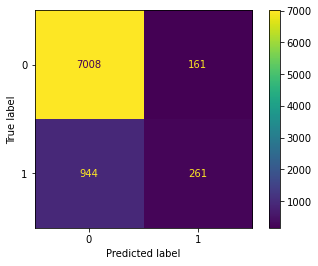

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test.astype(int), logmodel_predictions)

In [ ]:
print('Precision:', precision_score(Y_test.astype(int), logmodel_predictions))
print('Recall:', recall_score(Y_test.astype(int), logmodel_predictions))
print('F1:', f1_score(Y_test.astype(int), logmodel_predictions))

Precision: 0.6184834123222749
Recall: 0.216597510373444
F1: 0.3208358942839582


In [ ]:
neuralmodel = MLPClassifier()

In [ ]:
neuralmodel.fit(X_train, Y_train.astype(int))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
neuralmodel_predictions = neuralmodel.predict(X_test)

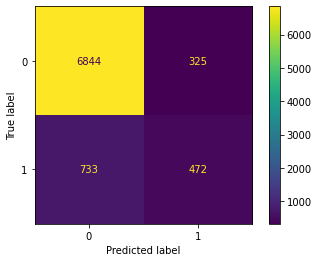

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test.astype(int), neuralmodel_predictions)

In [ ]:
print('Precision:', precision_score(Y_test.astype(int), neuralmodel_predictions))
print('Recall:', recall_score(Y_test.astype(int), neuralmodel_predictions))
print('F1:', f1_score(Y_test.astype(int), neuralmodel_predictions))

Precision: 0.5922208281053952
Recall: 0.391701244813278
F1: 0.4715284715284715


In [ ]:
svmmodel = SVC()

In [ ]:
svmmodel.fit(X_train,Y_train.astype(int))

SVC()

In [ ]:
svmmodel_predictions = svmmodel.predict(X_test)

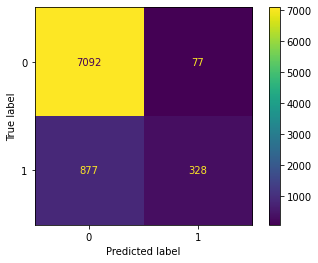

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test.astype(int), svmmodel_predictions)

In [ ]:
print('Precision:', precision_score(Y_test.astype(int), svmmodel_predictions))
print('Recall:', recall_score(Y_test.astype(int), svmmodel_predictions))
print('F1:', f1_score(Y_test.astype(int), svmmodel_predictions))

Precision: 0.8098765432098766
Recall: 0.2721991701244813
F1: 0.40745341614906827



=====Confusion Matrix (Random Forrest):=====

[[7161    8]
 [1150   55]]

=====Classification Report (Random Forrest):=====

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      7169
           1       0.87      0.05      0.09      1205

    accuracy                           0.86      8374
   macro avg       0.87      0.52      0.51      8374
weighted avg       0.86      0.86      0.80      8374


=====ROC Curve:=====



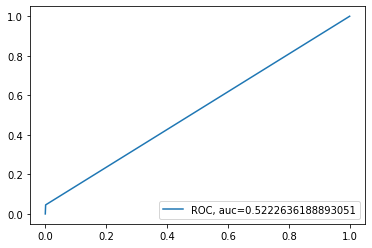

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=5, random_state=0)
clf_rf = clf_rf.fit(X_train, Y_train.astype(int))

#Evaluate Model
from sklearn.metrics import classification_report,confusion_matrix

predictions = clf_rf.predict(X_test)

print("\n=====Confusion Matrix (Random Forrest):=====\n")
print(confusion_matrix(Y_test.astype(int),predictions))

print("\n=====Classification Report (Random Forrest):=====\n")
print(classification_report(Y_test.astype(int),predictions))

#Plot ROC Curve
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(Y_test.astype(int),  predictions)
auc = metrics.roc_auc_score(Y_test.astype(int), predictions)
plt.plot(fpr,tpr,label="ROC, auc="+str(auc))
plt.legend(loc=4)

print("\n=====ROC Curve:=====\n")

plt.show()